# MA124 Maths by Computer: Assignment 3 
## Part B: Geometric Brownian Motion

Student number: 2109968

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

We consider numerical simulations of the stochastic differential equation for Geometric Brownian Motion given by 

$$
\dot S(t) = \mu S(t) + \sigma S(t) \xi(t)
$$

$S(t)$ is taken to be positive and represents the value of a stock at time $t$. The deterministic ODE $\dot S(t) = \mu S(t)$, describes exponential growth in the value of a stock. We consider $\mu > 0$ and refer to $\mu$ as the growth rate. The term $\sigma S(t) \xi(t)$ describes fluctuations in the value of a stock. $\xi(t)$ is a Gaussian random variable. The parameter $\sigma > 0$ is known as the volatility. Notice that the fluctuating term contains $S(t)$ itself. This models the fact that fluctuations in a stock price are proportional to the price. 

Time $t$ is measured in years. We choose $\mu$ as $0.05$, corresponding to 5% annual growth (non-compounded).

We consider the following parameter values: $S(0)=100, tf=5, \mu=0.05, \sigma=0.25, Npaths=100$

In [2]:
#Define SDE function
def SDE_GBM(S0, tf, mu, sigma, Npaths):
    Nsteps=tf*365
    # Generate the time grid and solution array
    t, dt = np.linspace(0,tf,Nsteps+1,retstep=True)
    S = np.zeros((Nsteps+1,Npaths))
    root_dt = np.sqrt(dt)
  
    # Time step starting from initial condition
    S[0,:] = S0;
    for n in range(Nsteps):
        F_of_S = S[n,:]
        S[n+1,:] =  S[n,:] + dt * mu * F_of_S + sigma * F_of_S * root_dt * np.random.randn(Npaths)
    
    return t,S

Firstly, we plot the 100 sample paths

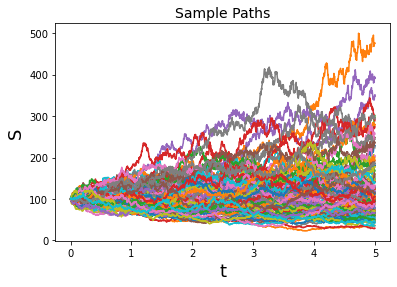

In [3]:
#Plots
t1,S1 = SDE_GBM(100,5,0.05,0.25,100)
plt.plot(t1,S1)
plt.xlabel("t", fontsize=18)
plt.ylabel("S", fontsize=18)
plt.title("Sample Paths", fontsize=14)
plt.show()

Secondly, we plot the mean (average value of the stock) and fill in the section of the region between that and 1 standard deviation above and below it.

With following parameter values: $S(0)=100, tf=5, \mu=0.05, \sigma=0.25, Npaths=2000$

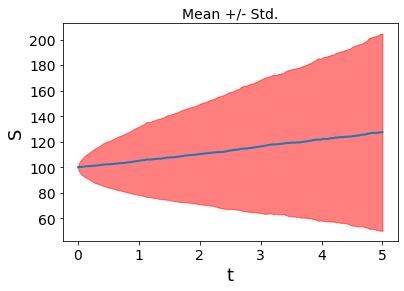

In [4]:
# call function with 2000 Npaths
t2,S2 = SDE_GBM(100,5,0.05,0.25,2000)

# plot with fill_between shows the mean +/- standard deviation as function of time.

# Compute the mean and standard deviation as function of time
S_mean = np.mean(S2,1)
S_std = np.std(S2,1)

# Plot shaded region between S_mean - S_std and S_mean + S_std 
plt.fill_between(t2, 
                 S_mean - S_std, 
                 S_mean + S_std, 
                 alpha=0.5, color="red")

# Plot the mean itself
plt.plot(t2,S_mean, linewidth=2)

# labels
plt.xlabel("t", fontsize=18)
plt.ylabel("S", fontsize=18)
plt.title("Mean +/- Std.", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Finally, we plot histograms at the end of 3 points, the 365th day, the 1000th day and the final day.
Following this, we note these correspond to a logarithmic normal distribution and thus plot this for the 3 times on the same graph and print the means and standard deviations.


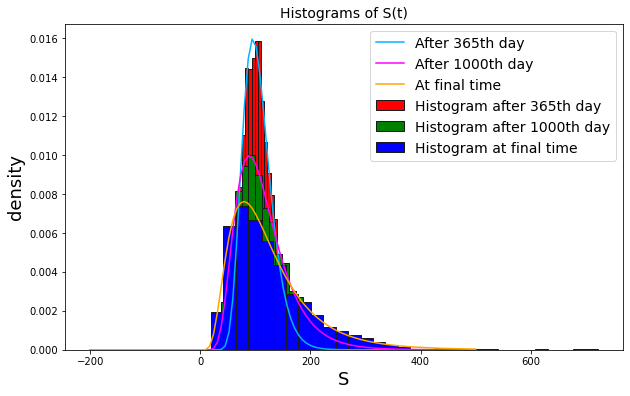

The mean after the 365th day is 105.0380693102958
The mean after the 1000th day is 114.68263276147701
The mean after the final day is 127.5718120182909

The STD after the 365th day is 26.766095030895137
The STD after the 1000th day is 49.134124466942154
The STD after the final day is 77.36328287018809


In [5]:
# Plot histograms
plt.figure(figsize=(10,6))

plt.hist(S2[365,:], bins = 31, density=True, color='r',edgecolor = (0.1,0.1,0.1), label=('Histogram after 365th day'))
plt.hist(S2[1000,:], bins = 31, density=True, color='g',edgecolor = (0.1,0.1,0.1), label=('Histogram after 1000th day'))
plt.hist(S2[-1,:], bins = 31, density=True, color='b',edgecolor = (0.1,0.1,0.1), label=('Histogram at final time'))

plt.xlabel("S", fontsize=18)
plt.ylabel("density", fontsize=18)
plt.title("Histograms of S(t)", fontsize=14)

# calc mean and std's
mean1=S_mean[365]
mean2=S_mean[1000]
mean3=S_mean[-1]

std1=S_std[365]
std2=S_std[1000]
std3=S_std[-1]

s,loc,scale=lognorm.fit(S2[365],floc=0)
x1 = np.linspace( -200, 500, 101)
plt.plot(x1,lognorm.pdf(x1,s,loc,scale), label=('After 365th day'), color=(0,0.7,1))

s,loc,scale=lognorm.fit(S2[1000],floc=0)
x2 = np.linspace(-200, 500, 101)
plt.plot(x2,lognorm.pdf(x2,s,loc,scale), label=('After 1000th day'), color=(1,0,1))

s,loc,scale=lognorm.fit(S2[-1],floc=0)
x3 = np.linspace( -200, 500, 101)
plt.plot(x3,lognorm.pdf(x3,s,loc,scale), label=('At final time'), color='orange')
plt.legend(fontsize=14)
plt.show()

# Plot normal distributions
#plt.plot(x1, y1, lw=3, label=('After 365th day'), color=(0,0.7,1))
#plt.plot(x2, y2, lw=3, label=('After 1000th day'), color=(1,0,1))
#plt.plot(x3, y3, lw=3, label=('At final time'),color='orange')
#plt.legend(fontsize=14)
#plt.show()
         
print('The mean after the 365th day is',mean1)
print('The mean after the 1000th day is',mean2)
print('The mean after the final day is',mean3)
print('\nThe STD after the 365th day is',std1)
print('The STD after the 1000th day is',std2)
print('The STD after the final day is',std3)

**Challenge**

We can see that the mean of the distribution (Modelling the value of the stock) increases over time so on average stocks increase in value over time when modelling their behaviour with the differential equation: 
$$
\dot S(t) = \mu S(t) + \sigma S(t) \xi(t)
$$

The mean only depends on the overall total of the values rather than the time that they occur. However the median is affected by the asymmetricity of the distribution as more of the values lay to the left of the mean and thus the median value of a stock is less than the mean value of a stock using this model.
